**Registro Clínicos de insuficiência cardiáca**



*  data set contém um conjunto de características 

  que podem ser usadas para prever a mortalidade por

  insuficiência cardíaca.







In [23]:
#importando Bibliotecas 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

importndo algumas das principais biblioteca como pandas e matplot

In [24]:
dataFrame = pd.read_csv('/content/drive/My Drive/heart_failure_clinical.csv')



Atribuir a uma variável o dataset escolhido

In [25]:
dataFrame.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Com o método head() é possível ver as promeiras linha dos dataframe, por padrão ele exibe as primeiras 5 linhas

In [26]:
dataFrame.describe()
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Podemos usar o describe() e info() para retornar um resumo estatístico das variáveis númericas e obter um resumo de valores não-nulos encontrados respectivamente.

In [27]:
dataFrame.isnull().sum().sort_values(ascending=False)[:10]

DEATH_EVENT            0
time                   0
smoking                0
sex                    0
serum_sodium           0
serum_creatinine       0
platelets              0
high_blood_pressure    0
ejection_fraction      0
diabetes               0
dtype: int64

Usando a combinação de aalguns métodos como o isnull().sum() podemos ver a soma dos valores nulos encontrados. Podemos ver um alto número de dados faltantes em alguns atributos


In [28]:

dataFrame = dataFrame.dropna()

Verifica se existem valores NAN, ? ou dados faltantes

# **Análise Preliminar dosdados**

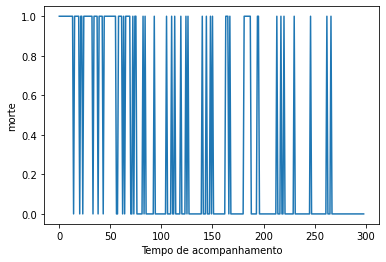

In [34]:
#plotando evento de morte em relação a idade
plt.plot(dataFrame.DEATH_EVENT)
plt.xlabel('Tempo de acompanhamento')
plt.ylabel('morte')
plt.show()

O gráfico mostra a correlação das mortes dos pacientes durante o período de acompanhamento do teste

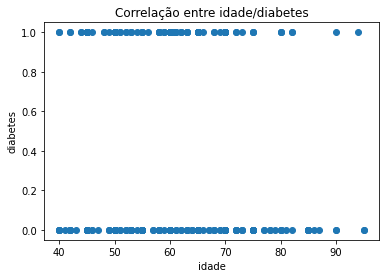

In [46]:
#plotando a correlação entre idade e pessoas diabéticas ou não
plt.scatter(dataFrame.age, dataFrame.diabetes)
plt.xlabel('idade')
plt.ylabel('diabetes')
plt.title('Correlação entre idade/diabetes')
plt.show()

In [43]:
#calculando correlação dos dados com o atributo fumante
smoking = dataFrame.corr()

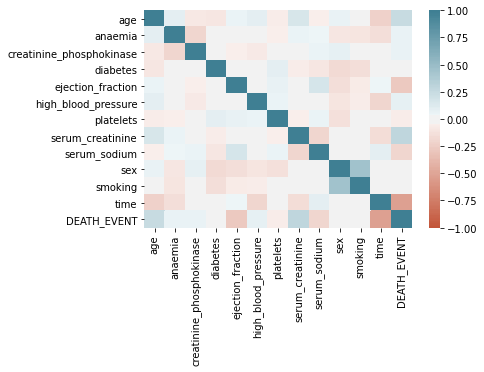

In [44]:
#plotando coeficientes de correlação em um mapa de calor
sns.heatmap(smoking,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200))
plt.show()

nalisando o mapa de calor podemos ver que no geral os atributos estão pouco relacionados entre si, fora algumas exceções como sexo e ser fumante.

#**Re-escala dos dados**

In [47]:
dataFrame = (dataFrame - dataFrame.min())/(dataFrame.max()-dataFrame.min())
dataFrame.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,0.000000,1.0
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,0.007117,1.0
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,0.010676,1.0
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,0.010676,1.0
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0.014235,1.0


In [49]:
#dividindo dados em atributos descritores e atributo de classe
X = dataFrame.drop(columns=['smoking'])
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,time,DEATH_EVENT
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.000000,1.0
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.007117,1.0
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,0.010676,1.0
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.010676,1.0
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.014235,1.0


In [51]:
Y = dataFrame.smoking
Y.head()

0    0.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: smoking, dtype: float64

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

# **Treinando os modelos e fazendo previsões**

In [55]:
#definindo modelo de regressão linear
linear = LinearRegression()
linear.fit(X_train,Y_train)
pred_linear = linear.predict(X_test)

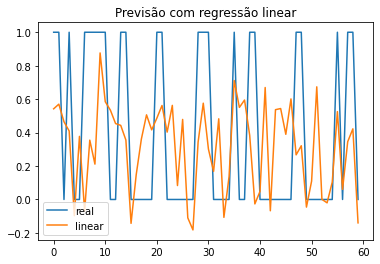

In [57]:
#plotando resultados da MLP
plt.plot(Y_test.reset_index(drop=True),label='real')
plt.plot(pred_linear,label='linear')
plt.legend()
plt.title('Previsão com regressão linear')
plt.show()

In [58]:
#definindo modelo de árvore de decisão
arvore = DecisionTreeRegressor()
arvore.fit(X_train,Y_train)
pred_arvore = arvore.predict(X_test)

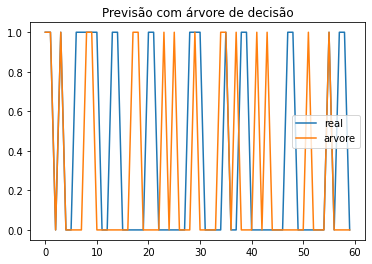

In [59]:
#plotando resultados da árvore de decisão
plt.plot(Y_test.reset_index(drop=True),label='real')
plt.plot(pred_arvore,label='arvore')
plt.legend()
plt.title('Previsão com árvore de decisão')
plt.show()

In [63]:
#definindo modelo de random forest
floresta = RandomForestRegressor(n_estimators=100)
floresta.fit(X_train,Y_train)
pred_floresta = floresta.predict(X_test)

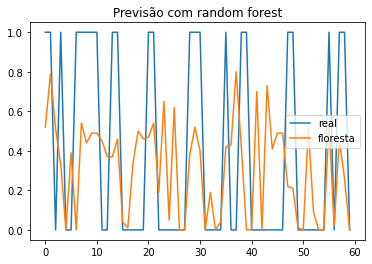

In [64]:
#plotando resultados da random forest
plt.plot(Y_test.reset_index(drop=True),label='real')
plt.plot(pred_floresta,label='floresta')
plt.legend()
plt.title('Previsão com random forest')
plt.show()

In [65]:
#define modelo MLP
mlp = MLPRegressor(hidden_layer_sizes=(200,50),activation='logistic',max_iter=1000)
mlp.fit(X_train,Y_train)
pred_mlp = mlp.predict(X_test)

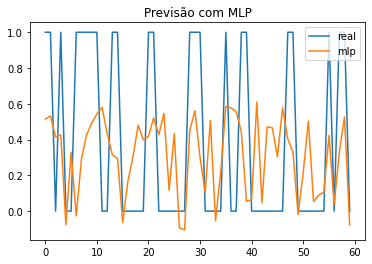

In [66]:
#plotando resultados da MLP
plt.plot(Y_test.reset_index(drop=True),label='real')
plt.plot(pred_mlp,label='mlp')
plt.legend()
plt.title('Previsão com MLP')
plt.show()

Com a visualização dos gráficos fica bem mais fácil ver que a árvore de decisão foi a que mais se aproximou dos valores reais reais ficando a frente até mesmo da random forest. A mlp e a regressão linear foram a que menos se aproximaram dos valores reais. 

# **Avaliando os Modelos**

## **Mean Absolut Error(MAE)**

In [67]:
from sklearn.metrics import mean_absolute_error

In [68]:
#Mae Árvore
mean_absolute_error(Y_test,pred_linear)

0.4145681345338389

In [69]:
#Mae Árvore
mean_absolute_error(Y_test,pred_arvore)

0.4

In [70]:
#Mae Random Forest
mean_absolute_error(Y_test,pred_floresta)

0.3869999999999999

In [71]:
#Mae MLP
mean_absolute_error(Y_test,pred_mlp)

0.40785035425287025

### **Mean Squared Error (MSE)**

In [72]:
from sklearn.metrics import mean_squared_error

In [73]:
mean_squared_error(Y_test,pred_linear)

0.23531488544499615

In [74]:
mean_squared_error(Y_test,pred_arvore)

0.4

In [75]:
mean_squared_error(Y_test,pred_floresta)


0.2309866666666667

In [76]:
mean_squared_error(Y_test,pred_mlp)


0.22342116074504087

##**Root Mean Squared Error(RMSE)**

In [81]:
mean_squared_error(Y_test,pred_linear)**(1/2)

0.4850926565564523

In [82]:
mean_squared_error(Y_test,pred_arvore)**(1/2)

0.6324555320336759

In [83]:
mean_squared_error(Y_test,pred_floresta)**(1/2)

0.48061072258811155

In [84]:
mean_squared_error(Y_test,pred_mlp)**(1/2)

0.47267447651109834

Diferentemente das atividades anteriores onde a random forest sempre alcanssava os melhores resultados, podemos ver que na avaliação dos modelos que a árvore de decisões esteve sempre a frente das demais. E que as outras métricas obtiveram resultados muito próximos uma das outras.